There are some basic operations about PySyft

Some Goals:

+ Addtion and multiplication in the context of secure computation (2PC)
+ Matrix addition and matrix multiplication in the context of secure computation (2PC)
+ Measure some metrics about secure computation, such as total time and commuiciation info

In [1]:
import torch
import syft as sy
import time
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 创建工作机
hook = sy.TorchHook(torch)
bob = sy.VirtualWorker(hook, id="bob")
alice = sy.VirtualWorker(hook, id="alice")
crypto_provider = sy.VirtualWorker(hook, id="crypto_provider")

In [3]:
comm = []
matrix_dim = []

for n in range(1, 7):
    row, col = 16 * (2 ** n), 16 * (2 ** n)
    matrix_dim.append(row)

    A = torch.randint(0, 2**16-1, (row, col))
    B = torch.randint(0, 2**16-1, (row, col))

    A_ = A.share(bob,alice, crypto_provider=crypto_provider)
    B_ = B.share(bob,alice, crypto_provider=crypto_provider)

    # seucre multiplication
    sy.comm_total = 0           # commuication
    time_start = time.time()    # time

    C = A_.mm(B_)               # mm() is secure matrix multiplication, is quivalent to matmul()
                                # and is defined in ~/gsq_workplace/arinn/PySyft/syft/frameworks/torch/tensors/interpreters/additive_shared.py line 679
    C.get()

    comm_total = sy.comm_total
    comm.append(comm_total)

    print("matrix dimension = {} : Total communication is {:.5f} MB, and total time is {:.5f} s in secure multiplication."
            .format(row, ((comm_total) / 2**20), (time.time() - time_start)))           # 10 ** 6 in yp_workplace/ariann/ariann/preprocess.py line 237 instead of 2 ** 20
    del sy.comm_total

matrix dimension = 32 : Total communication is 0.04591 MB, and total time is 1.32346 s in secure multiplication.
matrix dimension = 64 : Total communication is 0.16310 MB, and total time is 1.06048 s in secure multiplication.
matrix dimension = 128 : Total communication is 0.63185 MB, and total time is 0.84976 s in secure multiplication.
matrix dimension = 256 : Total communication is 2.50687 MB, and total time is 1.12688 s in secure multiplication.
matrix dimension = 512 : Total communication is 10.00686 MB, and total time is 1.25906 s in secure multiplication.
matrix dimension = 1024 : Total communication is 40.00687 MB, and total time is 1.98404 s in secure multiplication.


In [4]:
comm, matrix_dim

([48143, 171019, 662547, 2628645, 10492957, 41950245],
 [32, 64, 128, 256, 512, 1024])

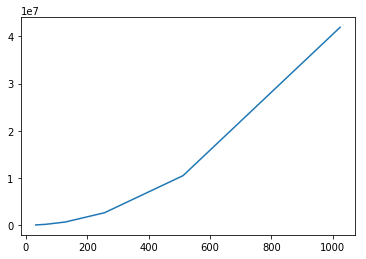

In [5]:
plt.plot(np.array(matrix_dim), np.array(comm))
plt.show()